# The Homoscedasticity Assumption

## Introduction

The last assumption in the LINE acronym is equal variance, AKA homoscedasticity. Let's get into what that means and how to evaluate it!

## Objectives

You will be able to:

* Describe the homoscedasticity assumption of linear regression
* Diagnose issues with homoscedasticity using visualizations and statistical tests

## Homoscedasticity and Heteroscedasticity

Linear regression assumes **homoscedasticity of errors**. The opposite of homoscedasticity is heteroscedasticity. The etymology essentially means "same scatter" for homoscedasticity and "different scatter" for heteroscedasticity. (You will also see them spelled homos**k**edasticity and heteros**k**edasticity.)

We will use the terms "equal variance" and "unequal variance" interchangeably with homoscedasticity and heteroscedasticity.

Heteroscedasticity often means that there is a "cone" shape, where the model residuals are smaller when the target is smaller or smaller when the target is larger.

<img src="images/unequal_cones.png" width="700"/>

Heteroscedasticity of error does not bias the coefficients in a linear regression but it makes them less precise ([see article](https://www.itl.nist.gov/div898/handbook/eda/section3/eda33q9.htm)).

## Visualizing Error Variance

### Feature vs. Target (Simple Linear Regression Only)

For simple linear regression it is possible to visualize the predictor vs. the target, to see whether the points are evenly scattered around the regression line or they are nearer/farther from the regression line depending on the value of the target.

Here is an example with some synthetic data:

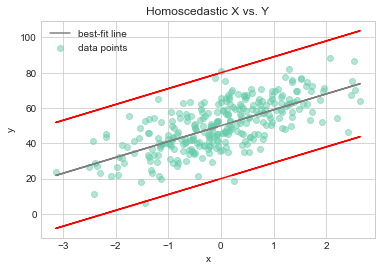

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
plt.style.use('seaborn-whitegrid')

# Generate synthetic regression with predetermined gaussian noise
scale = 10
x_generated, y_generated, coef = make_regression(
    n_samples=300, n_features=1, coef=True, noise=scale, random_state=8
)
y_generated += 50

# We know the fit line because we generated the data (no need to model)
fit_line_generated = coef * x_generated.flatten() + 50

# We set the scale of the normal distribution, so we know that 99% of the
# points should be captured by these lines (empirical rule)
top_line = fit_line_generated - 3 * scale
bottom_line = fit_line_generated + 3 * scale

# Plot data and lines
fig, ax = plt.subplots()
ax.scatter(x_generated, y_generated, color="mediumaquamarine", alpha=0.5, label="data points")
ax.plot(x_generated, fit_line_generated, color="gray", label="best-fit line")
ax.plot(x_generated, top_line, color="red")
ax.plot(x_generated, bottom_line, color="red")

# Customize labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Homoscedastic X vs. Y")
ax.legend();

You can tell that this is _homoscedastic_ (has equal variance) because the red lines (showing the distribution of the predictions vs. the real data points) are parallel to the best-fit line.

And here's an example using the auto MPG data:

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


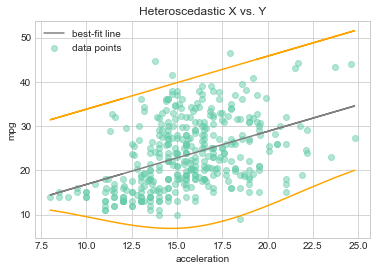

In [5]:
import pandas as pd
import statsmodels.api as sm
from scipy.interpolate import make_interp_spline

# Load x and y data from CSV
data = pd.read_csv("data/auto-mpg.csv")
y_mpg = data["mpg"]
x_mpg = data["acceleration"]

# Build a simple linear regression model and extract slope + intercept
# to get the best-fit line
model = sm.OLS(y_mpg, sm.add_constant(x_mpg))
results = model.fit()
slope = results.params["acceleration"]
intercept = results.params["const"]
fit_line_mpg = slope * x_mpg + intercept

# Just plotting an approximation of what we see on the graph (created
# through trial and error with hard-coded values, then creating a
# spline to make a smoothed appearance)
x_quantiles = [x_mpg.quantile(q) for q in np.linspace(0, 1, 5)]
top_line = fit_line_mpg + 17
bottom_spline = make_interp_spline(x_quantiles, [11, 7, 7, 8, 20], k=3)
bottom_line = bottom_spline(x_mpg.sort_values())

# Plot data and lines
fig, ax = plt.subplots()
ax.scatter(x_mpg, y_mpg, color="mediumaquamarine", alpha=0.5, label="data points")
ax.plot(x_mpg, fit_line_mpg, color="gray", label="best-fit line")
ax.plot(x_mpg, top_line, color="orange")
ax.plot(x_mpg.sort_values(), bottom_line, color="orange")

# Customize labels
ax.set_xlabel("acceleration")
ax.set_ylabel("mpg")
ax.set_title("Heteroscedastic X vs. Y")
ax.legend();

You can tell that this is _heteroscedastic_ because of the cone shape on the bottom. The top looks fairly linear, but the fact that the top and bottom don't match is an indication that something is wrong with the model specification (e.g. a non-linear relationship).

#### Note About Red/Orange Lines

The red/orange lines on these plots are intended to help you understand what you should be looking for. You DO NOT need to plot lines like this; you can just create a scatter plot and then visually inspect for these patterns.

### Residuals Plot (Simple or Multiple Linear Regression)

For multiple regression it won't work to plot the features vs. target in 2D like this. So, a plot that works for either simple or multiple regression is a **residuals plot**. This means the target value will be along the x-axis while the residuals will be along the y-axis.

Now instead of the orange lines being parallel to a diagonal best-fit line, they should simply be horizontal. This can mean that it's a bit easier to interpret compared to the feature vs. target plots above, even for simple linear regression.

Here is an example with some synthetic data:

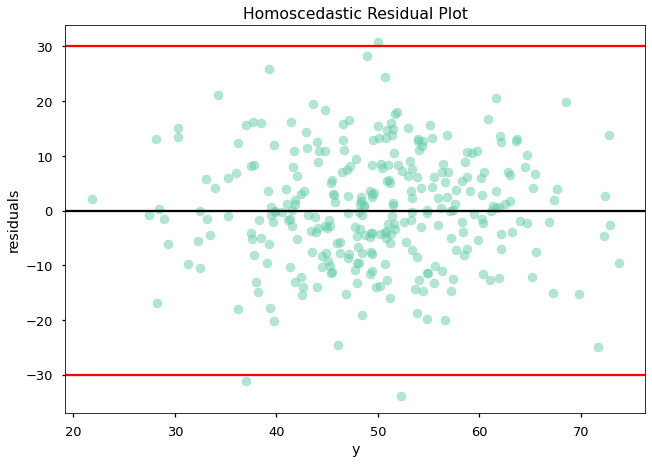

In [3]:
resids_generated = y_generated - fit_line_generated

# Create scatter plot of data
fig, ax = plt.subplots()
ax.scatter(fit_line_generated, resids_generated, color="mediumaquamarine", alpha=0.5)

# Plot horizontal lines
ax.axhline(y=0, color="black")
ax.axhline(y=scale*3, color="red")  # Again, we know the position of these
ax.axhline(y=-scale*3, color="red") # lines because we generated the data

# Customize labels
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Homoscedastic Residual Plot");

Now, instead of looking for the lines to be parallel to the best-fit line, we can simply look at whether the lines are horizontal. Because the red lines here are horizontal, we can tell that this is _homoscedastic_.

And here's an example using the auto MPG data:

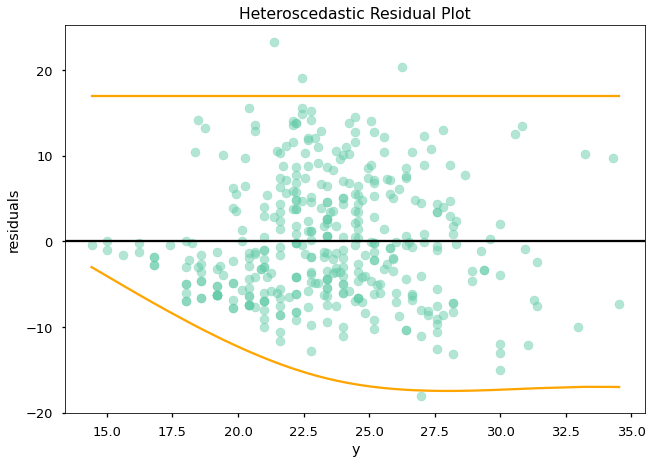

In [4]:
# Create scatter plot of data
fig, ax = plt.subplots()
ax.scatter(fit_line_mpg, results.resid, color="mediumaquamarine", alpha=0.5)
ax.axhline(y=0, color="black")

# Again, plotting an approximation
y_quantiles = [fit_line_mpg.quantile(q) for q in np.linspace(0, 1, 5)]
bottom_spline = make_interp_spline(y_quantiles, [-3, -14, -16, -17, -17], k=3)
bottom_line = bottom_spline(fit_line_mpg.sort_values())
ax.plot([fit_line_mpg.min(), fit_line_mpg.max()], [17, 17], color="orange")
ax.plot(fit_line_mpg.sort_values(), bottom_line, color="orange")

# Customize labels
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Heteroscedastic Residual Plot");

Here the "cone" shape on the bottom is easier to see. Because of this shape (meaning that the variance in the residuals is increasing as `y` increases, rather than being consistent) we can tell that this is _heteroscedastic_.

## Statistical Testing for Homoscedasticity

Several statistical tests are available for checking homoscedasticity of residuals.

#### Goldfeld-Quandt Test

One popular statistical test for homoscedasticity is the [Goldfeld-Quandt test](https://en.wikipedia.org/wiki/Goldfeld%E2%80%93Quandt_test), which divides the dataset into two groups, then finds the MSE of the residuals for each group. The ratio of the second group's `mse_resid` divided by the first group's `mse_resid` becomes a statistic that can be compared to the f-distribution to find a p-value.

There is a StatsModels implementation ([documentation here](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_goldfeldquandt.html)) that returns:

1. Goldfeld-Quandt test statistic
2. Goldfeld-Quandt test p-value
3. Ordering

(Ordering relates to the direction of the heteroscedasticity you want to be able to detect. By default it is `'increasing'` but you can also specify `'decreasing'` or `'two-sided'`.)

This implementation actually creates models and computes residuals for each subset of the dataset, so you pass in the target and features, not the residuals.

In [5]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [6]:
het_goldfeldquandt(y_generated, x_generated, alternative='two-sided')

(1.064941143291257, 0.7014676435876456, 'two-sided')

In [7]:
het_goldfeldquandt(y_mpg, x_mpg.values.reshape(-1,1), alternative='two-sided')

(2.423945504791773, 1.22044607975262e-09, 'two-sided')

The null hypothesis for this test is homoscedasticity, i.e. that the variance in the residuals neither increases nor decreases as the sub-sample changes.

For the generated data, we have a p-value of about 0.7, so we fail to reject the null hypothesis at an alpha of 0.05. This means we consider the generated data to be homoscedastic.

For the auto MPG data, we have a p-value of about .000000001, so we reject the null hypothesis at an alpha of 0.05. This means we consider the auto MPG data to be heteroscedastic.

#### Breusch-Pagan Test

Another popular statistical test for homoscedasticity is the [Breusch-Pagan test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test). It is a type of $\chi^2$ test based on the [Lagrange multiplier test](https://en.wikipedia.org/wiki/Score_test) and the underlying concept is that you are trying to see whether you can linearly predict the residuals using the provided features.

There is a StatsModels implementation ([documentation here](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html)) that returns:

1. Lagrange multiplier statistic
2. Lagrange multiplier p-value
3. Breusch-Pagan test statistic
4. Breusch-Pagan test p-value

This implementation expects you to pass in the residuals as the first argument and the features (including a constant) as the second argument.

In [8]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [9]:
het_breuschpagan(sm.OLS(y_generated, sm.add_constant(x_generated)).fit().resid, sm.add_constant(x_generated))

(0.1956987661898224,
 0.6582153107631223,
 0.1945209994805444,
 0.6594999728629689)

In [10]:
het_breuschpagan(results.resid, sm.add_constant(x_mpg))

(6.023194926772518,
 0.014119064285488344,
 6.085977163823662,
 0.014054760063763048)

One again the null hypothesis is homoscedasticity, which we fail to reject for the generated data and reject for the auto MPG data.

#### Other Tests

StatsModels also has implementations of Engle's test ([documentation here](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_arch.html)) and White's Lagrange multiplier test ([documentation here](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_white.html)).

## Summary

Linear regression assumes homoscedasticity of errors, meaning that the variance of the residuals should be equal across the different values of the target. Violating this assumption means that the coefficients will be less precise, but not biased. Residual plots are useful for visualizing homoscedasticity/heteroscedasticity in both simple and multiple regression models, and there are several statistical tests available as well.